Fine-tune a pretrained GPT-2 model on the OpenTriviaQA: https://github.com/uberspot/OpenTriviaQA/ ([CC-BY-SA-4.0 license](https://github.com/uberspot/OpenTriviaQA/blob/master/LICENSE))


The dataset was prepared by downloading the dataset and running the prepare_OpenTriviaQA.py script in ../dataprep/

```
python prepare_OpenTriviaQA.py --shuffle --split=0.9 ..\..\..\datasets\text\en\OpenTriviaQA-master\categories OpenTriviaQA.txt
Slurping animals
Slurping brain-teasers
Slurping celebrities
Slurping entertainment
Slurping for-kids
Slurping general
Slurping geography
Slurping history
Slurping hobbies
Slurping humanities
Slurping literature
Slurping movies
Slurping music
Slurping newest
Slurping people
Slurping rated
Slurping religion-faith
Slurping science-technology
Slurping sports
Slurping television
Slurping video-games
Slurping world
QAs mid-count: 34361
Matching entries count: 34353
Entries - split_index: 30917 of 34353
OpenTriviaQA.train.txt: len=3671591
OpenTriviaQA.val.txt: len=408887
```
A train/validation split was cut at 90%.

The script creates entries in the form:

```
Q: What essential vitamin is supplied through the consumption of carrots?
A: Vitamin A<|endoftext|>
Q: Name the Titan who stole fire from Zeus and gave it to mortals.
A: Prometheus<|endoftext|>
Q: What object did Isaac Newton use to demonstrate the decomposition of white light into a color spectrum?
A: Prism<|endoftext|>
```
(Newlines after <|endoftext|> were added above for readability.)

At inference time, we'll pass the question (or a similar text) until A: as the start_text.

In [1]:
from gptbench import Train, empty_config

In [2]:
ben = Train('opentrivia-gpt2', seed=0xC0B01C0B)

cfg = empty_config()

cfg.model.set(dtype='bfloat16') # , flash_attn=False

# we're doing gradient accummulation to use a batch_size of 16 while accumulating batches of 4 entries (trainer.accum_size setting)
# if you get an out of memory error, lower the accum_size:
cfg.trainer.set(learning_rate=1e-4, batch_size=16, accum_size=4)
#cfg.trainer.set(learning_rate=1e-3, batch_size=3)

cfg.train.set(eval_period=200, eval_iters=50)

cfg.sample.set(eot_stop=-1, start_text='Q:')

#ben.init_pretrained('gpt2', cfg)

force_new = False
if ben.can_load() and not force_new:
    ben.load(cfg)
else:
    ben.init_pretrained('gpt2', cfg)    

Loading checkpoint from ./checkpoints/opentrivia-gpt2/
Dataset: encoding utf-8 to tokens
Dataset: loading uint16 tokens
Dataset: encoding utf-8 to tokens
Checkpoint: iter=6800 (0.125 epoch), loss train=2.2578 val=2.6947 eval->2.6947
Dataset train_path: ../data/OpenTriviaQA/OpenTriviaQA.train.txt, val_path: ../data/OpenTriviaQA/OpenTriviaQA.val.txt, train_split: None, vocab_size: 50257
Model params: 124.44M


In [3]:
# the model was loaded above using a dummy dataset, because we didn't provide one - set the ARC data:
# train_split=1 means no validation dataset, to maximize training data
ben.set_datasets(class_name='gpt2', # GPT2TokensDataset class
                 train_path='../data/OpenTriviaQA/OpenTriviaQA.train.txt', 
                 val_path='../data/OpenTriviaQA/OpenTriviaQA.val.txt') 

# set training log periods to avoid cluttering the training output
ben.set_train_log_periods(sample_period=250, dot_period=1, loss_period=50)

In [4]:
# and train for n iters
ben.train(iter_count=1000)

Dataset: encoding utf-8 to tokens
Dataset: loading uint16 tokens
Dataset: encoding utf-8 to tokens
Training
.Iter 1 (0.000 epoch): loss train=3.7969, val=3.7875, eval->3.7875
==> Saving model at iter=1, eval loss->3.7875 
.................................................
Iter 50 loss=3.1328, iter_dt=935.50ms
..................................................
Iter 100 loss=3.0234, iter_dt=933.97ms
..................................................
Iter 150 loss=3.0312, iter_dt=926.14ms
..................................................
Iter 200 (0.004 epoch): loss train=2.8406, val=2.8681, eval->2.8681
==> Saving model at iter=200, eval loss->2.8681 
..................................................
Iter 250 loss=2.9141, iter_dt=977.35ms
Sampling: Q: What did Josh Eavesen, whom he so much admired, describe as his best friend in Rubén?
A: Salvador Dali
..................................................
Iter 300 loss=2.9336, iter_dt=930.10ms
..............................................

In [5]:
# and train for n iters
ben.train(iter_count=1000)

Training
..................................................
Iter 1050 loss=2.6953, iter_dt=929.69ms
..................................................
Iter 1100 loss=2.7148, iter_dt=929.17ms
..................................................
Iter 1150 loss=2.7148, iter_dt=930.83ms
..................................................
Iter 1200 (0.022 epoch): loss train=2.5831, val=2.7491, eval->2.7491
==> Saving model at iter=1200, eval loss->2.7491 
..................................................
Iter 1250 loss=2.7227, iter_dt=930.26ms
Sampling: Q: Sean Astin and Janelle Monae
..................................................
Iter 1300 loss=2.7109, iter_dt=929.79ms
..................................................
Iter 1350 loss=2.6875, iter_dt=931.16ms
..................................................
Iter 1400 (0.026 epoch): loss train=2.5447, val=2.7403, eval->2.7403
==> Saving model at iter=1400, eval loss->2.7403 
..................................................
Iter 1450 lo

In [9]:
ben.train(iter_count=3000)

Training
..................................................
Iter 2050 loss=2.6211, iter_dt=935.33ms
..................................................
Iter 2100 loss=2.6016, iter_dt=935.69ms
..................................................
Iter 2150 loss=2.6445, iter_dt=932.47ms
..................................................
Iter 2200 (0.041 epoch): loss train=2.4719, val=2.7156, eval->2.7156
==> Saving model at iter=2200, eval loss->2.7156 
..................................................
Iter 2250 loss=2.6484, iter_dt=982.44ms
Sampling: Q: Rifleman Craig Fortman was killed in a shootout with police. What was the name of his bullet-riddled body that was recovered in the busy freeway during the Los Angeles police Department shootout?
A: Steve Belly II
..................................................
Iter 2300 loss=2.5820, iter_dt=936.12ms
..................................................
Iter 2350 loss=2.6055, iter_dt=935.08ms
................................................

In [15]:
ben.train(iter_count=5000)

Training
..................................................
Iter 5050 loss=2.5117, iter_dt=926.93ms
..................................................
Iter 5100 loss=2.4883, iter_dt=928.91ms
..................................................
Iter 5150 loss=2.4961, iter_dt=941.48ms
..................................................
Iter 5200 (0.096 epoch): loss train=2.3125, val=2.7103, eval->2.7103
..................................................
Iter 5250 loss=2.4414, iter_dt=929.09ms
Sampling: Q: What is the name of the title character from 1970s animated romantic comedy Oz?
A: Bobbie
..................................................
Iter 5300 loss=2.4609, iter_dt=928.47ms
..................................................
Iter 5350 loss=2.4922, iter_dt=929.30ms
..................................................
Iter 5400 (0.100 epoch): loss train=2.3116, val=2.7084, eval->2.7084
..................................................
Iter 5450 loss=2.4609, iter_dt=929.70ms
...........

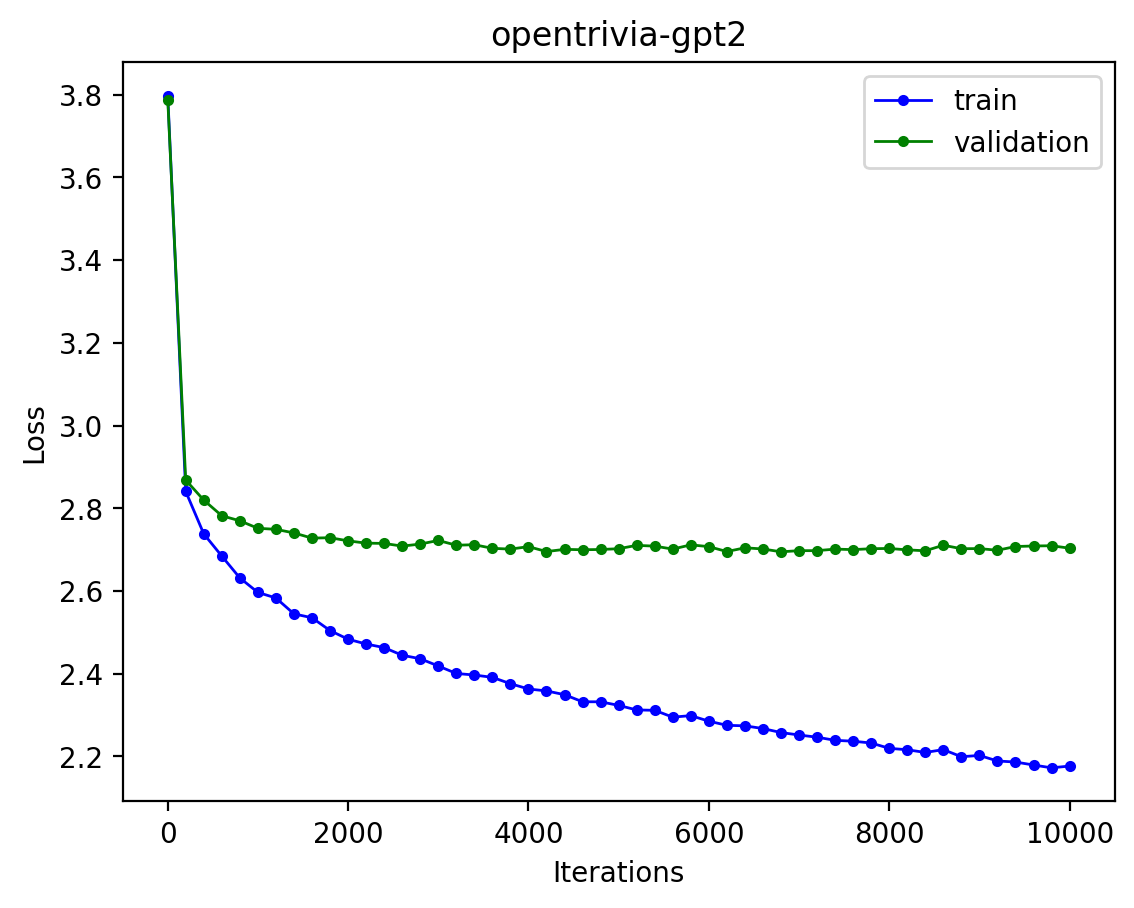

In [17]:
ben.plot_loss()

It seems to be overfitting to training data, as the validation loss stabilized while training loss keeps going down.

I suppose it's debatable how much validation data is useful for a generative model like this one (with relatively little data), but the increasing divergence between the two loss metrics can't be good news.

In [3]:
ben.sample("Q: Why is the sky blue?\nA:", top=0.2, count=5)

Q: Why is the sky blue?
A: Because of the suns light.
--------------------------------------------------------------------------------
Q: Why is the sky blue?
A: Because of the blue sky
--------------------------------------------------------------------------------
Q: Why is the sky blue?
A: Because of the blue sky
--------------------------------------------------------------------------------
Q: Why is the sky blue?
A: Because of the blue sky
--------------------------------------------------------------------------------
Q: Why is the sky blue?
A: Because of the color of the sky


In [4]:
ben.sample("Q: What state of matter is ice in?\nA:", top=0.2, count=5)

Q: What state of matter is ice in?
A: Antarctic
--------------------------------------------------------------------------------
Q: What state of matter is ice in?
A: Greenland
--------------------------------------------------------------------------------
Q: What state of matter is ice in?
A: Antarctic
--------------------------------------------------------------------------------
Q: What state of matter is ice in?
A: Antarctic
--------------------------------------------------------------------------------
Q: What state of matter is ice in?
A: Earth


In [6]:
ben.sample("Q: Which substance is made of oxygen and hydrogen?\nA:", top=0.2, count=5)

Q: Which substance is made of oxygen and hydrogen?
A: Nitrogen
--------------------------------------------------------------------------------
Q: Which substance is made of oxygen and hydrogen?
A: Nitrogen
--------------------------------------------------------------------------------
Q: Which substance is made of oxygen and hydrogen?
A: Nitrogen
--------------------------------------------------------------------------------
Q: Which substance is made of oxygen and hydrogen?
A: Nitrogen
--------------------------------------------------------------------------------
Q: Which substance is made of oxygen and hydrogen?
A: Nitrogen


In [7]:
ben.sample("Q: What is the capital of Portugal?\nA:", top=0.2, count=5)

Q: What is the capital of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the capital of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the capital of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the capital of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the capital of Portugal?
A: Lisbon


In [8]:
ben.sample("Q: What is the smallest city of Portugal?\nA:", top=0.2, count=5)

Q: What is the smallest city of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the smallest city of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the smallest city of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the smallest city of Portugal?
A: Lisbon
--------------------------------------------------------------------------------
Q: What is the smallest city of Portugal?
A: Lisbon


In [10]:
ben.sample("Q: How many species of tiger exist?\nA:", top=0.2, count=5)

Q: How many species of tiger exist?
A: 3
--------------------------------------------------------------------------------
Q: How many species of tiger exist?
A: 3
--------------------------------------------------------------------------------
Q: How many species of tiger exist?
A: 3
--------------------------------------------------------------------------------
Q: How many species of tiger exist?
A: 2,000
--------------------------------------------------------------------------------
Q: How many species of tiger exist?
A: 2,000


In [19]:
ben.sample("""Q: In a mixture, a magnet is used to separate some particles from sand. The dark particles are most likely made of which element?""", top=40, count=5)

Q: In a mixture, a magnet is used to separate some particles from sand. The dark particles are most likely made of which element?
A: Carbon
--------------------------------------------------------------------------------
Q: In a mixture, a magnet is used to separate some particles from sand. The dark particles are most likely made of which element?
A: Iron
--------------------------------------------------------------------------------
Q: In a mixture, a magnet is used to separate some particles from sand. The dark particles are most likely made of which element?
A: Nickel
--------------------------------------------------------------------------------
Q: In a mixture, a magnet is used to separate some particles from sand. The dark particles are most likely made of which element?
A: Water
--------------------------------------------------------------------------------
Q: In a mixture, a magnet is used to separate some particles from sand. The dark particles are most likely made of whic

In [16]:
ben.sample("The")

The treasure, hidden deep in the maze of Babylon, Tom came across the floating creek. Tom was attacked by the rats. The rats were so big, that Tom just pushed one of them off the roller coaster.
A: True

Fine-tuning clearly taught the "Q: A:" formatting. But the answers are pretty bad. Possible reasons?
- We only trained so far on about 18% of the data
- Training dataset is small, at about 30k question-answer pairs
- The model is small

See the opentrivia_small_dropout notebook for a try to get rid of overfitting by increasing dropout.